In [1]:
# maths for Meia
import math
import random

def lcm(a,b):
    return int(abs(a * b) / math.gcd(a,b) if a and b else 0)

def exfract(a,b):
    gcdab = math.gcd(a, b)
    a /= gcdab
    b /= gcdab
    mult = random.randrange(2, 15)
    return (int(a), int(b), mult, int(a*mult), int(b*mult))

def prdfr(p):
    '''periodic p as fraction'''
    l = len(str(p))
    return (p, 10**l - 1)

def frdec(mxln):
    a = random.randrange(1, mxln)
    b = random.randrange(1, mxln)
    return (a , 10**len(str(a)))

def ordfrc(mxln, mxv):
    res = []
    for i in range(mxln):
        a = random.randrange(1, mxv)
        b = random.randrange(1, mxv)
        res.append((a,b))
        res.sort(key=lambda x: x[0]/x[1])
    return res

if __name__=="__main__":
    for i in range(3):
        a = random.randrange(2, 20)
        b = random.randrange(2, 20)
        print('fraction ', exfract(a, b))
    for i in range(2):
        a, b = prdfr(random.randrange(1, 1000))
        print(a, '/', b, '=', a/b)
    for i in range(2):
        a, b = frdec(10000)
        print(a, b, a/b)
    for i in range(2):
        a = random.random() * 10
        b = random.random() * 10 + 1
        print(a, '/', b, a/b)
        
    for i in range(4):
        print(ordfrc(5, 25))
        
    for i in range(4):
        a = random.randrange(-5, 5)
        b = random.randrange(-5, 5)
        print('x, y: ', (a, b))

fraction  (19, 6, 4, 76, 24)
fraction  (2, 5, 3, 6, 15)
fraction  (13, 16, 4, 52, 64)
88 / 99 = 0.8888888888888888
185 / 999 = 0.18518518518518517
7795 10000 0.7795
6219 10000 0.6219
7.201906741244116 / 8.59117918585843 0.838290831263171
5.866074534668763 / 10.3098555970491 0.5689773711619935
[(4, 16), (10, 24), (9, 17), (24, 18), (24, 12)]
[(6, 24), (6, 22), (6, 19), (14, 23), (19, 10)]
[(23, 20), (17, 11), (16, 9), (10, 4), (15, 3)]
[(3, 22), (13, 24), (14, 19), (15, 3), (23, 4)]
x, y:  (-3, -3)
x, y:  (-5, 1)
x, y:  (3, 2)
x, y:  (0, -3)


In [2]:
# https://stackoverflow.com/questions/65480162/how-to-remove-repititve-pattern-from-an-image-using-fft

from skimage.io import imread, imsave
from matplotlib import pyplot as plt
import numpy as np
import cv2

img = imread('skin.jpg')

R = img[...,2]
G = img[...,1]
B = img[...,0]

f1 = np.fft.fft2(R)
fshift1 = np.fft.fftshift(f1)
phase_spectrumR = np.angle(fshift1)
magnitude_spectrumR = 20*np.log(np.abs(fshift1))

f2 = np.fft.fft2(G)
fshift2 = np.fft.fftshift(f2)
phase_spectrumG = np.angle(fshift2)
magnitude_spectrumG = 20*np.log(np.abs(fshift2))

f3 = np.fft.fft2(B)
fshift3 = np.fft.fftshift(f3)
phase_spectrumB = np.angle(fshift3)
magnitude_spectrumB = 20*np.log(np.abs(fshift2))

#===============================
# LPF # HPF
magR = np.zeros_like(R) #  = fshift1 # 
magR[magR.shape[0]//4:3*magR.shape[0]//4,
 magR.shape[1]//4:3*magR.shape[1]//4] = np.abs(fshift1[magR.shape[0]//4:3*magR.shape[0]//4,
  magR.shape[1]//4:3*magR.shape[1]//4]) # =0 #

rows = img.shape[0]
cols = img.shape[1]
crow, ccol = int(rows / 2), int(cols / 2)  # center

# Circular HPF mask, center circle is 0, remaining all ones
#mask = np.ones((rows, cols, 2), np.uint8)
mask = np.ones((rows, cols), np.uint8)
r = 30
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r # circular
#mask_area = abs((x - center[0]) + y * 0.)  <= r # directional x
#mask_area = abs(x * 0. + (y - center[1]))  <= r # directional y
mask[mask_area] = 0

bsf = scipy.signal.firwin(61, [1/12 - 0.03, 1/12 + 0.03], pass_zero='bandstop', fs=1)
scipy.ndimage.convolve1d(image, bsf, axis=0)

# apply mask and inverse DFT
#print(magR.shape, mask.shape)
fshift = magR * mask

#fshift_mask_mag = 1000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))
fshift_mask_mag = 1000 * np.log(cv2.magnitude(fshift[:, :], fshift[:, :]))
resR = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_mask_mag)))

#resR = np.abs(np.fft.ifft2(np.fft.ifftshift(magR)))
resR = R - resR
#===============================
magnitude_spectrumR
plt.subplot(221)
plt.imshow(R, cmap='gray')
plt.title('Original')

plt.subplot(222)
plt.imshow(magnitude_spectrumR, cmap='gray')
plt.title('Magnitude Spectrum')

plt.subplot(223)
plt.imshow(phase_spectrumR, cmap='gray')
plt.title('Phase Spectrum')

plt.subplot(224)
plt.imshow(resR, cmap='gray')
plt.title('Processed')

NameError: name 'scipy' is not defined

In [1]:

import numpy as np
import scipy as sp
import scipy.optimize

capital = 150000
periods = 180
interest = 0.035
growth = 0.03

def calc_payment(x):
    ini = x
    x = 0
    for i in range(int(periods/12)):
        increase = ini*(1+growth)**(i)
        x += increase
    return x - capital

def pv_annuity(cap, r, g, t):
    return cap * (r-g) / (1-((1+g)/(1+r))**t)

def pmt_annuity(pay, r, g, t):
    return pay / (r-g) * (1-((1+g)/(1+r))**t)

solution = scipy.optimize.minimize(calc_payment,x0=100)

print(solution)
print(180/12)

print(pv_annuity(capital, interest, growth, periods))
print(pmt_annuity(881.63, interest, growth, periods))

print(0.7*1/(interest+growth))

      fun: -1680992803.7075548
 hess_inv: array([[1]])
      jac: array([-0.])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 1
     njev: 15
   status: 0
  success: True
        x: array([-90373169.85000004])
15.0
1289.2168548432105
102577.38991170967
10.769230769230768


[-0.04   -0.0398 -0.0396 ...  0.9994  0.9996  0.9998]
0.05 0.1


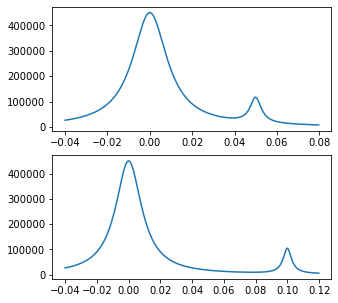

In [38]:
import matplotlib.pyplot as plt
import math
import numpy as np

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5,5))

# Equation - dispersion relation 
omega_p = 500
k       = 5
u_0     = 5
u_02    = 10
m       = 90
M       = 2
omega   = np.arange(-20, 500, 0.1)
ksi     = omega / omega_p
ksi_0   = k*u_0 / omega_p
ksi_02  = k*u_02 / omega_p

print(ksi)
print(ksi_0, ksi_02)
eps = 0.00001

F       = (m/M) / (ksi**2+eps*10) + 1 / ((ksi-ksi_0)**2+eps)
F2      = (m/M) / (ksi**2+eps*10) + 1 / ((ksi-ksi_02)**2+eps)

# Fig 1
ax1.plot(ksi[:600], F[:600])
# Fig 2
ax2.plot(ksi[:800], F2[:800])
plt.show()

In [50]:

import numpy as np
from scipy import signal

list_of_array = np.array([[1, 1, 1, 0, 0, 0], 
                          [0, 1, 0, 0, 0, 0], 
                          [1, 1, 1, 0, 0, 0], 
                          [0, 0, 2, 4, 4, 0], 
                          [0, 0, 0, 2, 0, 0], 
                          [0, 0, 1, 2, 4, 0]])

hrg_krnl = np.array([[1, 1, 1],
                     [0, 1, 0],
                     [1, 1, 1]])

'''summary = 0 # variable for calculating sum
list_max = [] # list that i can store my all possible sums

for i in range(len(list_of_array)):
    for j in range(len(list_of_array[i])):
        if i<4 and j<4:
            summary = list_of_array[i][j]+list_of_array[i][j+1]+list_of_array[i][j+2]+list_of_array[i+1][j+1]+list_of_array[i+2][j]+list_of_array[i+2][j+1]+list_of_array[i+2][j+2]
            list_max.append(summary)
            summary = 0

list_max.sort(reverse = True)
print(list_max)
print(list_max[0])'''

grad = signal.convolve2d(list_of_array, hrg_krnl, boundary='fill', fillvalue=0, mode='same')    
print(grad)
hrxy = np.where(grad > 6)
print(hrxy[0][1])
print([grad[hrxy[0][i], hrxy[1][i]] for i in range(len(hrxy[0]))])

[[ 2  2  2  0  0  0]
 [ 4  7  4  2  0  0]
 [ 2  4  8 10  8  4]
 [ 2  3  6  7  6  0]
 [ 0  3  9 19 14  8]
 [ 0  0  3  4  6  0]]
2
[7, 8, 10, 8, 7, 9, 19, 14, 8]


In [99]:

import pandas as pd

df = pd.DataFrame({"type_commune": ["Centre Urbain", "Urbain", "Rural", "Rural", "Rural", "Centre Urbain", "Rural"],
                   "code": ["1610311", "3510503", "1610511", "1610513", "1610515", "3910101", "3910503"],
                   "pop_t": [13537.0, 14544.0, 7890.0, 5860.0, 6341.0, 102098.0, 32.0]})

# add cd_reg derived from code
df['cd_reg'] = [str(cd[:4]) for cd in df['code']]

for index, row in df[df.type_commune == "Centre Urbain"].iterrows():
    dfl0 = df.loc(axis=0)[df.cd_reg == row['cd_reg']] # choose the region
    dfl1 = dfl0.loc(axis=0)[dfl0.type_commune == "Rural"] # only consider rural communities
    print(dfl1.loc(axis=0)[dfl1.pop_t < row['pop_t']]) # consider population

  type_commune     code   pop_t cd_reg
2        Rural  1610511  7890.0   1610
3        Rural  1610513  5860.0   1610
4        Rural  1610515  6341.0   1610
  type_commune     code  pop_t cd_reg
6        Rural  3910503   32.0   3910


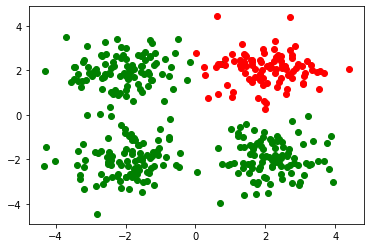

In [126]:
# https://stackoverflow.com/questions/65529725/how-to-create-and-plot-xor-data-for-a-specific-range-in-python/65530531#65530531
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

centers = [[-2,2],[-2,-2],[2,-2],[2,2]]
X, y = make_blobs(n_samples = 400, n_features=2, centers=centers, cluster_std=0.8, random_state=40)

X1 = [x for idx,x in enumerate(X[:,0]) if y[idx]<=2]
Y1 = [x for idx,x in enumerate(X[:,1]) if y[idx]<=2]
X2 = [x for idx,x in enumerate(X[:,0]) if y[idx]>=3]
Y2 = [x for idx,x in enumerate(X[:,1]) if y[idx]>=3]

plt.scatter(X1,Y1,color="green")
plt.scatter(X2,Y2,color="red")

plt.show()

In [3]:
# Quake reverse sqrt
from ctypes import c_float, c_int32, cast, byref, POINTER

def ctypes_isqrt(number):
    threehalfs = 1.5
    x2 = number * 0.5
    y = c_float(number)

    i = cast(byref(y), POINTER(c_int32)).contents.value
    i = c_int32(0x5f3759df - (i >> 1))
    y = cast(byref(i), POINTER(c_float)).contents.value

    y = y * (threehalfs - (x2 * y * y))
    return y

print(ctypes_isqrt(2))

0.7069300386983334


In [1]:
# https://stackoverflow.com/questions/65539855/using-recursion-to-find-derivative-of-a-function-three-point-endpoint-formula
import math

formula = input('Input the formula here : ')
n = int(input('Input the degree of derivative here: '))

def f(formula, x):
    return eval(formula, globals(), {'x': x}) # use global and local scope

x0 = float(input('Input the approximation of x here : ')) # no error handling here - TODO
h = float(input('Input the stepsize h here : '))

def TPEP(x, h, n, formula): # Three Point End Point
    if n <= 1: # need to check for iteration stop: the grade of derivatives
        return (1/(2*h))*(-3*f(formula, x)+4*f(formula, x+h)-f(formula, x+2*h))
    return (1/(2*h))*(-3*TPEP(x,h,n-1,formula)+4*TPEP(x+h,h,n-1,formula)-TPEP(x+2*h,h,n-1,formula)) # error-term omitted

print('Derivative of f in x0 = {0} is : '.format(x0))
print("f'({0}) = {1:.7f} (Three Point Endpoint)".format(x0, TPEP(x0, h, n, formula)))


Input the formula here : math.sin(x)**2
Input the degree of derivative here: 1
Input the approximation of x here : 2
Input the stepsize h here : 1
Derivative of f in x0 = 2.0 is : 
f'(2.0) = -1.4867780 (Three Point Endpoint)


In [16]:
import math
from functools import reduce

def chinese_remainder(n, a):
    sum = 0
    prod = reduce(lambda a, b: a*b, n)
    for n_i, a_i in zip(n, a):
        p = prod // n_i
        sum += a_i * mul_inv(p, n_i) * p
    return sum % prod

def mul_inv(a, b):
    b0 = b
    x0, x1 = 0, 1
    if b == 1: return 1
    while a > 1:
        q = a // b
        a, b = b, a%b
        x0, x1 = x1 - q * x0, x0
    if x1 < 0: x1 += b0
    return x1

def primes2(limit):
    if limit < 2: return []
    if limit < 3: return [2]
    lmtbf = (limit - 3) // 2
    buf = [True] * (lmtbf + 1)
    for i in range((int(limit ** 0.5) - 3) // 2 + 1):
        if buf[i]:
            p = i + i + 3
            s = p * (i + 1) + i
            buf[s::p] = [False] * ((lmtbf - s) // p + 1)
    return [2] + [i + i + 3 for i, v in enumerate(buf) if v]

def slvqdrcgr(a, m, p):
    for n in range(math.floor(math.log(a)/math.log(p)/2)):
        if a % p != 0: # p does not divide a
            if p == 2:
                if n == 1:
                    return (1, 2) # x ≡ 1 (mod 2) TODO: append A, X (more solutions!)
                elif n == 2:
                    if a % 4 == 1:
                        return (1, 4) # x ≡ ±1 (mod 4) TODO: +-
                else:
                    if a % 8 == 1:
                        return (-1, 2*n - 1) # two solutions (mod 2n-1)
            else: # p odd
                if a**((p-1)/2) % p == 1:
                    return (2, p*n) # there are two solutions (mod pn).
        else: # p divides a
            if a % p**n == 0: # p**n divides a
                if n == 2*m+1:
                    return (0, p*m+1) # x ≡ 0 (mod pm+1)
                if n == 2*m:
                    return (0, p*m) # x ≡ 0 (mod pm)
            for r in range(n+1): # 0 < r < n
                if math.gcd(a, p**n) == p**r:
                    if r % 2 != 0:
                        return (-1, -1) # no solution
                    else:
                        X = x / p**m # x = p**m * X
                        A = a / p**(2*m) # a = p**(2*m) * A
                        if p == 2:
                            if n-2*m == 1:
                                return (1, 2) #1 solution (mod 2) 
                            if n-2*m == 2 and A % 4 == 1:
                                return (2, 4) #2 solutions (mod 4) 
                            if n-2*m > 2 and A % 8 == 1:
                                return (2, 2*n - m - 1) #2 solutions (mod 2n-m-1) 
                        else:
                            return (2, p*n - m) #two solutions (mod pn-m)
    return (-1, -1) # no solution

if __name__ == '__main__':
    #nn = [3, 5, 7]
    #aa = [2, 3, 2]
    #print(chinese_remainder(nn, aa))
    
    for p in primes2(177):
        print(slvqdrcgr(177, 987, p))

(-1, -1)


NameError: name 'x' is not defined

In [6]:
# https://stackoverflow.com/questions/65546444/how-do-i-solve-square-congruences-with-the-chinese-remainder-theorem
from functools import reduce
import math

def llinear_diophantinex(a, b, divmodx=1, x=1, y=0, offset=0, withstats=False, pow_mod_p2=False): 
  origa, origb = a, b 
  r=a  
  q = a//b 
  prevq=1  
  if a == 1:
    return 1
  if withstats == True: 
    print(f"a = {a}, b = {b}, q = {q}, r = {r}")   
  while r != 0:  
       prevr = r  
       a,r,b = b, b, r   
       q,r = divmod(a,b) 
       x, y = y, x - q * y 
       if withstats == True: 
         print(f"a = {a}, b = {b}, q = {q}, r = {r}, x = {x}, y = {y}")  
  y = 1 - origb*x // origa - 1
  if withstats == True: 
    print(f"x = {x}, y = {y}")  
  x,y=y,x 
  modx = (-abs(x)*divmodx)%origb 
  if withstats == True: 
    print(f"x = {x}, y = {y}, modx = {modx}") 
  if pow_mod_p2==False:   
    return (x*divmodx)%origb, y, modx, (origa)%origb
  else: 
    if x < 0: return (modx*divmodx)%origb 
    else: return (x*divmodx)%origb

def CRT(numbers, modulusx, withstats=False):

   from functools import reduce
   from operator import mul

   invx, modx, nums = [], [], []
   k = len(numbers)
   total = reduce(mul, modulusx)
   modx = [total//x for x in modulusx]
   modsx = [x%y for x, y in zip(modx, modulusx)] 
   invsx = [llinear_diophantinex(x,y,pow_mod_p2=True) for x, y in zip(modsx, modulusx)]
   modw = [(x*y)%total for x, y in zip(modx, invsx)] 
   sumw = [sum(x * y for x, y in zip(modw, numbers))] 
   crtmod = divmod(sumw[0], total)
   print(f"{crtmod[1]} (mod {total})")
   return crtmod[1]
   

def isSquare(hm):
  cr=math.isqrt(hm)
  if cr*cr == hm:
     return True
  return False  

def modexp_rl(a, b, n, withstats=False):
    r = 1
    while 1:
        if b % 2 == 1:
            r = r * a % n
            if withstats==True:
              print(b, r, a, n)
        b //= 2
        if b == 0:
            break
        a = a * a % n
        if withstats==True:
          print(b, r, a, n)
    return r

def legendre_symbol(a, p):
    ls = pow(a, (p - 1) // 2, p)
    return -1 if ls == p - 1 else ls

def solvesquarecongruence(n, modulus):
    count = 2
    solvable = legendre_symbol(n, modulus)
    if solvable == -1:
       return False
    while not isSquare(N):
       N = n + count * modulus
       count+=1
    print(f"x^2 = {math.isqrt(N)} mod {modulus}")
    return math.isqrt(N), modulus-math.isqrt(N)

CRT([256, 255],[720, 960])

507600 (mod 691200)


507600

In [39]:

"""
A large package can hold 5 itmes, while the small package can hold only one item. The
available number of both large and small packages is limited. All items must be placed
in packages and used packages have to be filled up completely.

Write a function that calculates the minimum number of packages needed to hold a given
number of items. If it's not possible to meet the requirements return -1.

For Example, if we have 16 items,, 2 large and 10 small packages, the function should return 
8(2 large packages + 6 small packages)

"""

def knapsack01_dp(items, limit): # items is a list of tuples ('name', weight, value)
    table = [[0 for w in range(limit + 1)] for j in range(len(items) + 1)] # init table of values to be maxed
    for j in range(1, len(items) + 1): # for all items
        item, wt, val = items[j-1] # get item details
        for wi in range(1, limit + 1): # weight index
            if wt > wi:
                table[j][wi] = table[j-1][wi] # keep config if next item weight is too high
            else:
                table[j][wi] = max(table[j-1][wi], table[j-1][wi-wt] + val) # add new item or keep, whatever is better
    result = []
    wlim = limit
    for j in range(len(items), 0, -1): # go down the table from the top (best config down right)
        was_added = table[j][wlim] != table[j-1][wlim] # a new item?
        if was_added:
            item, wt, val = items[j-1]
            result.append(items[j-1])
            wlim -= wt
    return result

print(knapSack(3, [1, 1, 1], [1, 2, 3], 3))
print(knapsack01_dp([('0', 1, 1), ('1', 1, 2), ('2', 1, 3)], 3))

[[0, 0, 0, 0], [0, 1, 1, 1], [0, 2, 3, 3], [0, 3, 5, 6]]
[('2', 1, 3), ('1', 1, 2), ('0', 1, 1)]


In [14]:

# given a number and a list of numbers return if the number can be made out of the 
# numbers in a list, numbers can be used as many times as needed

def canSum(target_sum, numbers, memo = {}):
    if target_sum in memo:
        return memo[target_sum], memo
    if target_sum == 0:
        return True, {}
    if target_sum < 0:
        return False, {}

    for n in numbers:
        remainder = target_sum - n
        if canSum(remainder, numbers)[0] == True:
            memo[target_sum] = True
            return True, memo

    memo[target_sum] = False
    return False, memo

print(canSum(4, [2]))
print(canSum(4, [2,1]))
print(canSum(4, [1,2]))
print(canSum(10, [2]))
print(canSum(10, [2,3]))
print(canSum(11, [2]))
print(canSum(7, [2]))

(True, {2: True, 4: True})
(True, {2: True, 4: True})
(True, {2: True, 4: True})
(True, {2: True, 4: True, 6: True, 8: True, 10: True})
(True, {2: True, 4: True, 6: True, 8: True, 10: True})
(False, {2: True, 4: True, 6: True, 8: True, 10: True, 1: False, 3: False, 5: False, 7: False, 9: False, 11: False})
(False, {2: True, 4: True, 6: True, 8: True, 10: True, 1: False, 3: False, 5: False, 7: False, 9: False, 11: False})


Text(0, 0.5, 'Probability of event (PMF)')

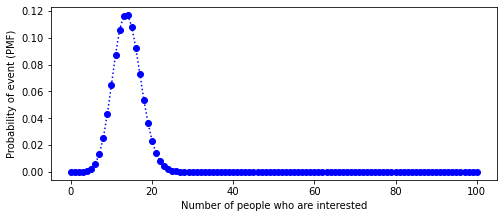

In [13]:

# Hypergeometric Distribution code adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html

import numpy as np
from scipy.stats import hypergeom, norm
import matplotlib.pyplot as plt

# (N, K, n) The hypergeometric distribution models drawing objects from a bin. N is the total number of objects, K is total number of Type I objects. The random variate represents the number of Type I objects in n drawn without replacement from the total population.
[N, K, n] = [2000, 278, 500]
[N, K, n] = [2000, 278, 100]
rv1 = hypergeom(N, K, n) 
x = np.arange(0, n+1)
pmf1 = rv1.pmf(x)

xlabel="Number of people who are interested"; ylabel="Probability of event (PMF)"
fig = plt.figure(figsize=(8,7))
ax1 = fig.add_subplot(211)
ax1.plot(x, pmf1, 'bo:', aa=True)
#ax1.vlines(x, 0, pmf1, lw=2);
ax1.set_xlabel(xlabel); ax1.set_ylabel(ylabel)

In [2]:
# maths for Rakki
import math
import random

def mult(mxln):
    a = random.randrange(1, mxln)
    b = random.randrange(1, mxln)
    return (a , b, a*b)

def div(mxln):
    a = random.randrange(1, mxln)
    b = random.randrange(1, mxln)
    return (a*b , b, a)

def add(mxln):
    a = random.randrange(1, mxln)
    b = random.randrange(1, mxln)
    sgn = random.choice(['+', '-'])
    if b > a:
        b, a = a, b
    return (a , sgn, b, eval('a' + sgn + 'b'))

if __name__=="__main__":
    for i in range(5):
        print('mult: ', mult(10))
    for i in range(3):
        print('div: ', div(10))
    for i in range(4):
        print(add(30))

mult:  (5, 3, 15)
mult:  (8, 8, 64)
mult:  (1, 3, 3)
mult:  (8, 6, 48)
mult:  (5, 1, 5)
div:  (12, 6, 2)
div:  (8, 2, 4)
div:  (5, 1, 5)
(9, '+', 6, 15)
(12, '-', 5, 7)
(24, '-', 16, 8)
(27, '+', 7, 34)


summation takes 82.0 ns.± 0.63 ns per loop (mean ± std. dev. of 5 runs 1000000 loops each)
subtraction takes 81.0 ns.± 0.49 ns per loop (mean ± std. dev. of 5 runs 1000000 loops each)
multiplication takes 79.0 ns.± 3.06 ns per loop (mean ± std. dev. of 5 runs 1000000 loops each)
division takes 84.0 ns.± 2.15 ns per loop (mean ± std. dev. of 5 runs 1000000 loops each)
square takes 197.0 ns.± 0.89 ns per loop (mean ± std. dev. of 5 runs 1000000 loops each)
sin takes 786.0 ns.± 4.4 ns per loop (mean ± std. dev. of 5 runs 1000000 loops each)


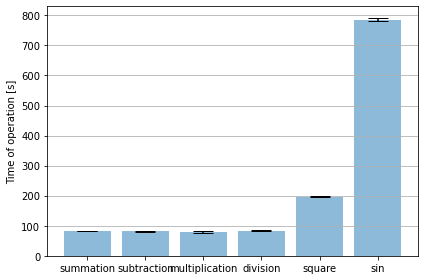

In [36]:
# Import necessary modules
import numpy as np
import time
import matplotlib.pyplot as plt

# Define functions to test
def summation(value):
    return value+value
    
def subtraction(value):
    return value-value

def multiplication(value):
    return value*3.4

def division(value):
    return value/3.5

def square(value):
    return value**2
    
def sin(value):
    return np.sin(value)

# Function that will evaluate the execution time
def time_execution(func, valueToEvaluate, nOuterCycles, nCycles):
    store = np.zeros( nOuterCycles)
    for i in range( nOuterCycles):
        start = time.time()
        for j in range(nCycles):
            func(valueToEvaluate)
        end = time.time()
        store[i]=(end-start)
    
    meanCycleTime=np.round(np.mean(store)*1e9/nCycles)
    stdCycleTime=np.round(np.std(store)*1e9/nCycles,2)
    print("%s takes %s ns.\u00B1 %s ns per loop (mean ± std. dev. of %s runs %s loops each)" %(func.__name__,meanCycleTime,stdCycleTime,nOuterCycles,nCycles))
    return func.__name__,meanCycleTime,stdCycleTime

# Time execution parameters
nCycles=1000000
nOuterCycles=5
value=1.1

# Executes the functions and appends the results to a list
valuesForPlot=[]
valuesForPlot.append(time_execution(summation,value,nOuterCycles,nCycles))
valuesForPlot.append(time_execution(subtraction,value,nOuterCycles,nCycles))
valuesForPlot.append(time_execution(multiplication,value,nOuterCycles,nCycles))
valuesForPlot.append(time_execution(division,value,nOuterCycles,nCycles))
valuesForPlot.append(time_execution(square,value,nOuterCycles,nCycles))
valuesForPlot.append(time_execution(sin,value,nOuterCycles,nCycles))

    
## Bar plot
# Collect entries for the plot
x_names =  []
y_values = []
error =    []

for i in valuesForPlot:
    x_names.append(i[0])
    y_values.append(i[1])
    error.append(i[2])

fig, ax = plt.subplots()
ax.bar(x_names, y_values, yerr=error,align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Time of operation [s]')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [38]:

from time import time

b = 2.5

t0 = time()

for i in range(1000000):
    a = b + 2.5

print("completed sums in %0.3fs." % (time() - t0))

t0 = time()

for i in range(1000000):
    a = 2.5 / b

print("completed divs in %0.3fs." % (time() - t0))

t0 = time()

for i in range(1000000):
    a = b**2

print("completed sqrs in %0.3fs." % (time() - t0))

completed sums in 0.078s.
completed divs in 0.080s.
completed sqrs in 0.179s.


In [21]:
import math

def sn(n):
    return int(n*(n-1)/2)

for n in range(1,20):
    print(sn(n) % n)
    
print(math.sqrt(4.5*4.5 + 3.5*3.5))
print(24*24)
print(21*21)

0
1
0
2
0
3
0
4
0
5
0
6
0
7
0
8
0
9
0
5.70087712549569
576
441


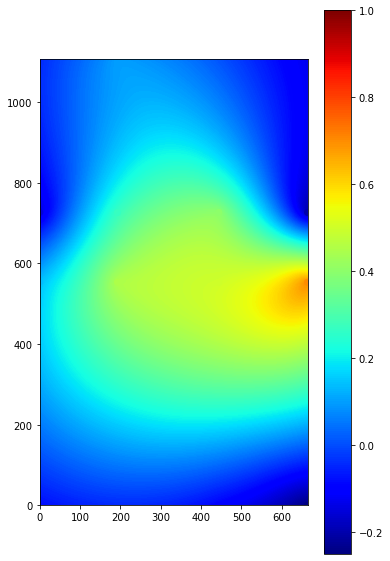

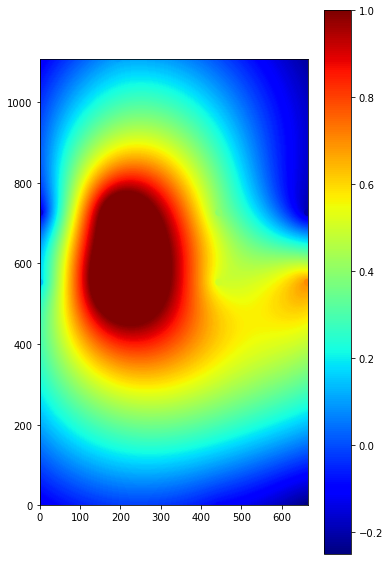

In [19]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import pandas as pd

x = [444, 664, 0, 193, 444, 664, 0, 193, 444, 664, 193]
y = [0, 0, 553, 553, 553, 553, 726, 726, 726, 726, 1107]

z = [-0.1, -0.25, 0.14, 0.45, 0.5, 0.7, -0.15, 0.27, 0.4, -0.2, 0.1]

# Set up a regular grid of interpolation points
xi, yi = np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
zi = rbf(xi, yi)

normi = plt.Normalize(vmin=-0.25, vmax=1)

plt.figure(figsize=(6,10))
plt.imshow(zi, vmin=-0.25, vmax=1, origin='lower', extent=[min(x), max(x), min(y), max(y)])

plt.contourf(xi, yi, zi, 500, norm=normi, cmap='jet')
#plt.contourf(xi, yi, zi, 500, cmap='jet')
plt.scatter(x, y, c=z, cmap='jet')
plt.colorbar()
plt.clim(-0.25, 1)

z = [-0.1, -0.25, 0.14, 1.45, 0.5, 0.7, -0.15, 1.27, 0.4, -0.2, 0.1]

# Interpolate
rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
zi = rbf(xi, yi)

normi = plt.Normalize(vmin=-0.25, vmax=1)

plt.figure(figsize=(6,10))
plt.imshow(zi, vmin=-0.25, vmax=1, origin='lower', extent=[min(x), max(x), min(y), max(y)])

plt.contourf(xi, yi, zi, 500, norm=normi, cmap='jet')
#plt.contourf(xi, yi, zi, 500, cmap='jet')
plt.scatter(x, y, c=z, cmap='jet')
plt.colorbar()
plt.clim(-0.25, 1)

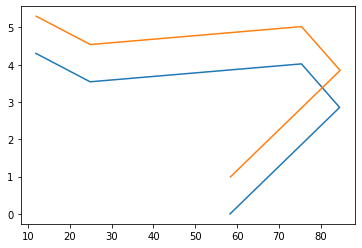

In [31]:


import numpy as np
import matplotlib.pyplot as plt

xN = [11.86478, 24.851482, 75.38245, 84.50359, 58.3]
yN = [4.3048816, 3.541581, 4.0219164, 2.854434, 0.0]

newX = []
newY = []

d = 1
for i in range(len(xN)-1):
    newX.append(xN[i]+dx)
    newY.append(yN[i]+dy)
    
    r = np.sqrt((xN[i+1]-xN[i])**2+(yN[i+1]-yN[i])**2) 
    dx = d/r*abs(yN[i+1]-yN[i])
    dy = d/r*abs(xN[i+1]-xN[i]) 

newX.append(xN[i+1]+dx)
newY.append(yN[i+1]+dy)

plt.plot(xN, yN)
plt.plot(newX, newY)
plt.show()


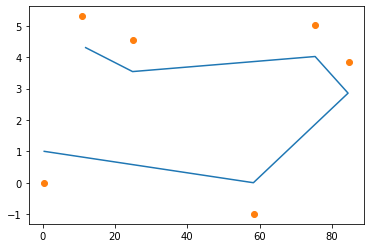

In [15]:


import numpy as np
import matplotlib.pyplot as plt

xN = [11.86478, 24.851482, 75.38245, 84.50359, 58.3, 0.4]
yN = [4.3048816, 3.541581, 4.0219164, 2.854434, 0.0, 1.0]

newX = []
newY = []

d = 1
dx = 1
dy = 1
s3 = dx*dx + dy*dy
    
for i in range(len(xN)-1):
    if s3 < 0:
        newX.append(xN[i]+dy)
        newY.append(yN[i]-dx)
    else:
        newX.append(xN[i]-dy)
        newY.append(yN[i]+dx)
        
    r = np.sqrt((xN[i+1]-xN[i])**2+(yN[i+1]-yN[i])**2) 
    dy = d/r*(yN[i+1]-yN[i])
    dx = d/r*(xN[i+1]-xN[i])
    
    s3 = dx*dx + dy*dy

if s3 < 0:
    newX.append(xN[i+1]+dy)
    newY.append(yN[i+1]-dx)
else:
    newX.append(xN[i+1]-dy)
    newY.append(yN[i+1]+dx)

plt.plot(xN, yN)
#plt.plot(newX, newY)
plt.plot(newX, newY, 'o')
plt.show()


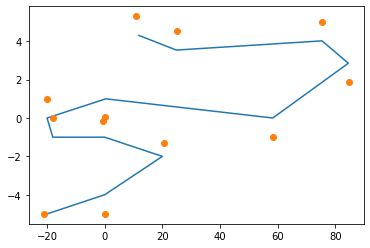

In [89]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

xN = [11.86478, 24.851482, 75.38245, 84.50359, 58.3, 0.4, -20, -18, 0, 20, 0, -20]
yN = [4.3048816, 3.541581, 4.0219164, 2.854434, 0.0, 1.0, 0, -1, -1, -2, -4, -5]

newX = []
newY = []

d = 1
dx = 1
dy = 1
s3 = dx*dx + dy*dy
x0 = xN[0]
y0 = yN[0]
    
for i in range(len(xN)-1):
    if s3 < 0:
        newX.append(xN[i]+dy)
        newY.append(yN[i]-dx)
    else:
        newX.append(xN[i]-dy)
        newY.append(yN[i]+dx)
    
    if i>0:
        f = interp1d(xN[i-1:i+1], yN[i-1:i+1], fill_value="extrapolate")
        x0 = (xN[i+1]-xN[i-1])/2 + xN[i]
        y0 = f(x0)
        r = np.sqrt((xN[i+1]-x0)**2+(yN[i+1]-y0)**2) 
        dy = d/r*(yN[i+1]-y0)
        dx = d/r*(xN[i+1]-x0)
    else:
        x0 = xN[i+1]
        y0 = yN[i+1]
        r = np.sqrt((xN[i+1]-xN[i])**2+(yN[i+1]-yN[i])**2) 
        dy = d/r*(yN[i+1]-yN[i])
        dx = d/r*(xN[i+1]-xN[i])
    
    s3 = dx*dx + dy*dy

if s3 < 0:
    newX.append(xN[i+1]+dy)
    newY.append(yN[i+1]-dx)
else:
    newX.append(xN[i+1]-dy)
    newY.append(yN[i+1]+dx)

plt.plot(xN, yN)
#plt.plot(newX, newY)
plt.plot(newX, newY, 'o')
plt.show()

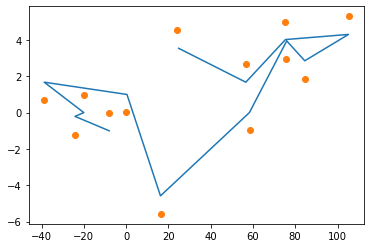

In [87]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

xN = [11.86478, 24.851482, 75.38245, 84.50359, 58.3, 0.4, -20, -8]
yN = [4.3048816, 3.541581, 4.0219164, 2.854434, 0.0, 1.0, 0, -1]

# refine xN, yN
xNN = []
yNN = []
for i in range(1,len(xN)):
    xNN.append(xN[i])
    yNN.append(yN[i])
    if i>0 and i < len(xN)-1:
        x0 = (xN[i+1]-xN[i-1])/2 + xN[i]
        xNN.append(x0)
        f = interp1d(xN[i-1:i+1], yN[i-1:i+1], fill_value="extrapolate")
        yNN.append(f(x0))
        
xN = xNN
yN = yNN

newX = []
newY = []

d = 1
dx = 1
dy = 1
s3 = dx*dx + dy*dy
    
for i in range(len(xN)-1):
    if s3 < 0:
        newX.append(xN[i]+dy)
        newY.append(yN[i]-dx)
    else:
        newX.append(xN[i]-dy)
        newY.append(yN[i]+dx)
        
    r = np.sqrt((xN[i+1]-xN[i])**2+(yN[i+1]-yN[i])**2) 
    dy = d/r*(yN[i+1]-yN[i])
    dx = d/r*(xN[i+1]-xN[i])
    
    s3 = dx*dx + dy*dy

if s3 < 0:
    newX.append(xN[i+1]+dy)
    newY.append(yN[i+1]-dx)
else:
    newX.append(xN[i+1]-dy)
    newY.append(yN[i+1]+dx)

plt.plot(xN, yN)
#plt.plot(newX, newY)
plt.plot(newX, newY, 'o')
plt.show()


In [15]:
a = { "a" : 1, "b" : 2 }
b = { "c" : 3, "d" : 4 }
a.update(b)
print(a)
print(a.items())

{'a': 1, 'b': 2, 'c': 3, 'd': 4}
dict_items([('a', 1), ('b', 2), ('c', 3), ('d', 4)])


In [14]:
# extended Euclidean Algorithm

def ea(a, b):
    '''Euclidean Algorithm'''
    if b>a:
        b, a = a, b
    r0 = 1
    while r0 > 0:
        r0 = a % b
        n0 = a // b
        a = b
        b = r0
    return a, b

def eea(a, b):
    '''Extended Euclidean Algorithm, returns gcd = ax+by as a,b,x,y'''
    if b>a:
        b, a = a, b
    r0 = 1
    i = 0
    while r0 > 0:
        r0 = a % b
        n0 = a // b
        a = b
        b = r0
        if i>1:
            x0, x1 = x1, x0 - n0 * x1
            y0, y1 = y1, y0 - n0 * y1
        elif i==0:
            x0 = 1
            y0 = -n0
        elif i==1:
            x1 = -n0
            y1 = -y0*n0 + 1
        i += 1
    return a, b, x0, y0

print(ea(198, 168))
print(eea(198, 168))

(6, 0)
(6, 0, -11, 13)


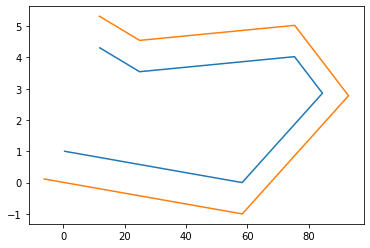

In [15]:
import numpy as np
import matplotlib.pyplot as plt

xN = [11.86478, 24.851482, 75.38245, 84.50359, 58.3, 0.4]
yN = [4.3048816, 3.541581, 4.0219164, 2.854434, 0.0, 1.0]

newX = []
newY = []

def findIntesection(p1x, p1y, p2x, p2y, p3x,p3y, p4x, p4y):
    dx12 = p2x - p1x
    dy12 = p2y - p1y
    dx34 = p4x - p3x
    dy34 = p4y - p3y

    denominator = (dy12*dx34-dx12*dy34)

    t1 = ((p1x - p3x) * dy34 + (p3y - p1y) * dx34)/ denominator

    t2 = ((p3x - p1x) * dy12 + (p1y - p3y) * dx12)/ -denominator;
    
    intersectX = p1x + dx12 * t1
    intersectY = p1y + dy12 * t1

    if (t1 < 0): t1 = 0
    elif (t1 > 1): t1 = 1
    if (t2 < 0): t2 = 0
    elif (t2 > 1): t2 = 1
    
    return intersectX,intersectY

def normalizeVec(x,y):
    distance = np.sqrt(x*x+y*y)
    return x/distance, y/distance

def getEnlarged(oldX, oldY, offset):
    num_points = len(oldX)
    
    for j in range(num_points):
        i = j - 1
        if i < 0:
            i += num_points
        k = (j + 1) % num_points

        vec1X =  oldX[j] - oldX[i]
        vec1Y =  oldY[j] - oldY[i]
        v1normX, v1normY = normalizeVec(vec1X,vec1Y)
        v1normX *= offset
        v1normY *= offset
        n1X = -v1normY
        n1Y = v1normX
        pij1X = oldX[i] + n1X
        pij1Y = oldY[i] + n1Y
        pij2X = oldX[j] + n1X
        pij2Y = oldY[j] + n1Y

        vec2X =  oldX[k] - oldX[j]
        vec2Y =  oldY[k] - oldY[j]
        v2normX, v2normY = normalizeVec(vec2X,vec2Y)
        v2normX *= offset
        v2normY *= offset
        n2X = -v2normY
        n2Y = v2normX
        pjk1X = oldX[j] + n2X
        pjk1Y = oldY[j] + n2Y
        pjk2X = oldX[k] + n2X
        pjk2Y = oldY[k] + n2Y
        
        intersectX,intersetY = findIntesection(pij1X,pij1Y,pij2X,pij2Y,pjk1X,pjk1Y,pjk2X,pjk2Y)
        
        #print(intersectX,intersetY)
        
        newX.append(intersectX)
        newY.append(intersetY)

getEnlarged(xN, yN, 1)

plt.plot(xN, yN)
plt.plot(newX, newY)
plt.show()

In [11]:
# Python program for brute force method to calculate stock span values 
  
# Fills list S[] with span values 
def calculateSpan(price, n, S): 
      
    # Span value of first day is always 1 
    S[0] = 1
  
    # Calculate span value of remaining days by linearly  
    # checking previous days 
    for i in range(1, n, 1): 
        S[i] = 1   # Initialize span value 
  
        # Traverse left while the next element on left is 
        # smaller than price[i] 
        j = i - 1
        while (j>= 0) and (price[i] >= price[j]) : 
                       S[i] += 1
                       j -= 1
                         
# A utility function to print elements of array 
def printArray(arr, n): 
    for i in range(n): 
        print(arr[i], end = " ") 

# Driver program to test above function     
#price = [10, 4, 5, 90, 120, 80]
price = [74, 665, 742] 
n = len(price) 
S = [None] * n 
  
# Fill the span values in list S[] 
calculateSpan(price, n, S) 
  
# print the calculated span values 
printArray(S, n) 

1 2 3 

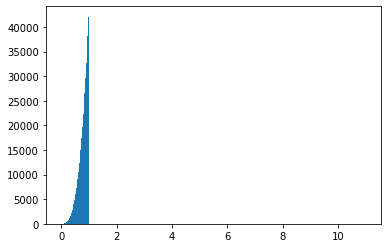

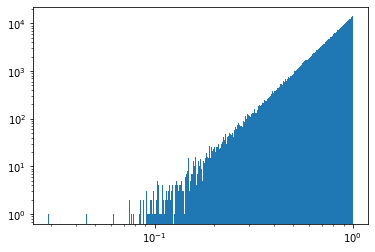

In [44]:
# https://stackoverflow.com/questions/65747225/use-pyplot-histogram-for-log-log-plot-wrong-slope-why
import numpy as np
import matplotlib.pyplot as plt

def ex_simulate(alpha, E_min, E_max, n):
    # n: numble of particles simulated
    rand = np.random.rand(n)
    #temp = rand*(E_max**(alpha+1)-E_min**(alpha+1))+E_min**(alpha+1)
    #temp = rand*E_max**(alpha+1)
    #out = temp**(1/(alpha+1))
    out = rand**(1/(alpha+1)) # * E_max
    return out

results = ex_simulate(3, 0, 10, 1000000)

bins = np.linspace(0, 11, 1000)
plt.hist(results, bins)
plt.show()

logbins = np.geomspace(results.min(), results.max(), 1000)
plt.hist(results, bins=logbins, log=True)
plt.xscale('log')
plt.show()

#print(results)

In [13]:
# U units for Z

def ea(a, b):
    '''Euclidean Algorithm'''
    if b>a:
        b, a = a, b
    r0 = 1
    while r0 > 0:
        r0 = a % b
        n0 = a // b
        a = b
        b = r0
    return a, b

def eea(a, b):
    '''Extended Euclidean Algorithm, returns gcd = ax+by as a,b,x,y'''
    if b>a:
        b, a = a, b
    r0 = 1
    i = 0
    while r0 > 0:
        r0 = a % b
        n0 = a // b
        a = b
        b = r0
        if i>1:
            x0, x1 = x1, x0 - n0 * x1
            y0, y1 = y1, y0 - n0 * y1
        elif i==0:
            x0 = 1
            y0 = -n0
        elif i==1:
            x1 = -n0
            y1 = -y0*n0 + 1
        i += 1
    return a, b, x0, y0

def getU(n):
    res = []
    for k in range(1, n):
        g = eea(n, k)
        if g[0] == 1:
            res.append(k)
    return res

print(getU(5))
print(getU(27))
print(getU(14))
print(getU(243))
print(2*3**4)

[1, 2, 3, 4]
[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26]
[1, 3, 5, 9, 11, 13]
[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59, 61, 62, 64, 65, 67, 68, 70, 71, 73, 74, 76, 77, 79, 80, 82, 83, 85, 86, 88, 89, 91, 92, 94, 95, 97, 98, 100, 101, 103, 104, 106, 107, 109, 110, 112, 113, 115, 116, 118, 119, 121, 122, 124, 125, 127, 128, 130, 131, 133, 134, 136, 137, 139, 140, 142, 143, 145, 146, 148, 149, 151, 152, 154, 155, 157, 158, 160, 161, 163, 164, 166, 167, 169, 170, 172, 173, 175, 176, 178, 179, 181, 182, 184, 185, 187, 188, 190, 191, 193, 194, 196, 197, 199, 200, 202, 203, 205, 206, 208, 209, 211, 212, 214, 215, 217, 218, 220, 221, 223, 224, 226, 227, 229, 230, 232, 233, 235, 236, 238, 239, 241, 242]
162


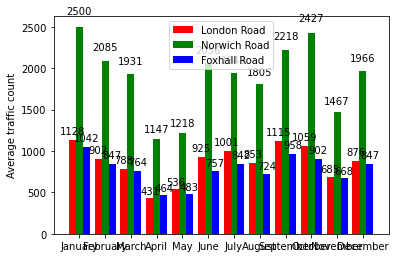

In [19]:

import numpy as np
import matplotlib.pyplot as plt

N = 12
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [1128, 902, 788, 431, 536, 925, 1001, 853, 1115, 1059, 685, 876]
rects1 = ax.bar(ind, yvals, width, color='r')

zvals = [2500,2085, 1931, 1147, 1218, 2056, 1943, 1805, 2218, 2427, 1467, 1966]
rects2 = ax.bar(ind+width, zvals, width, color='g')

kvals = [1042,847,764, 464, 483, 757, 842, 724, 958, 902, 668, 847]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Average traffic count')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('London Road', 'Norwich Road', 'Foxhall Road') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()
